In [29]:
import pandas as pd

bdf = pd.read_csv('data/credit-g.csv')
bdf.head().T

,0,1,2,3,4
checking_status,<0,0<=X<200,no checking,<0,<0
duration,6,48,12,42,24
credit_history,critical/other existing credit,existing paid,critical/other existing credit,existing paid,delayed previously
purpose,radio/tv,radio/tv,education,furniture/equipment,new car
credit_amount,1169,5951,2096,7882,4870
savings_status,no known savings,<100,<100,<100,<100
employment,>=7,1<=X<4,4<=X<7,4<=X<7,1<=X<4
installment_commitment,4,2,2,2,3
personal_status,male single,female div/dep/mar,male single,male single,male single
other_parties,none,none,none,guarantor,none


### About the Project
this project is about classification based on class is good or bad, so let's see our dataset biased or not!

### Check the dataset is Balanced or not

<AxesSubplot:ylabel='class'>

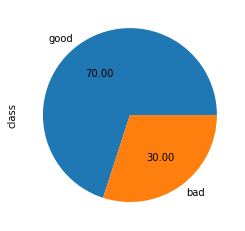

In [30]:
target = 'class'

bdf[target].value_counts().plot.pie(autopct='%.2f')

You can see the dataset is not on balancing and our model can get 70% of Accouracy by predicting all time good class

Our choice {Oversampling, Undersampling, Using class weight}

### Feature engiearing

check all of the features and best choice for them

* First, separate numerical and categurical features
* check all of the values for each catogorical feature and check the range for each numerical feature to

In [31]:
set(bdf.dtypes)

{dtype('int64'), dtype('O')}

all of the data types are integer or object like string

In [32]:
num_col = bdf.select_dtypes(exclude="object")
cat_col = bdf.select_dtypes(exclude="int64").drop(target, axis=1)

In [33]:
cat_col.head(5).T

,0,1,2,3,4
checking_status,<0,0<=X<200,no checking,<0,<0
credit_history,critical/other existing credit,existing paid,critical/other existing credit,existing paid,delayed previously
purpose,radio/tv,radio/tv,education,furniture/equipment,new car
savings_status,no known savings,<100,<100,<100,<100
employment,>=7,1<=X<4,4<=X<7,4<=X<7,1<=X<4
personal_status,male single,female div/dep/mar,male single,male single,male single
other_parties,none,none,none,guarantor,none
property_magnitude,real estate,real estate,real estate,life insurance,no known property
other_payment_plans,none,none,none,none,none
housing,own,own,own,for free,for free


In [34]:
num_col.head(5).T

,0,1,2,3,4
duration,6,48,12,42,24
credit_amount,1169,5951,2096,7882,4870
installment_commitment,4,2,2,2,3
residence_since,4,2,3,4,4
age,67,22,49,45,53
existing_credits,2,1,1,1,2
num_dependents,1,1,2,2,2


### Depper look on data
Now we see close at categurical features, deeper and distinguished between proper features for Onehot or Ordinary encoding

13 feature are categorical
7 feature are numerical


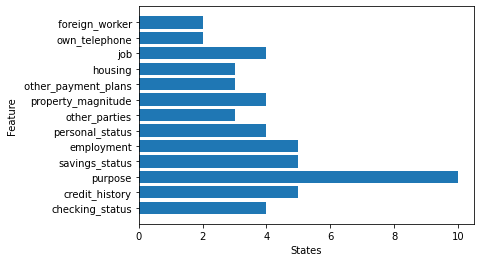

In [35]:
import matplotlib.pyplot as plt
import numpy as np

# Lets see how many categorical and numerical feature are there in dataset
print(len(cat_col.columns), 'feature are categorical')
print(len(num_col.columns), 'feature are numerical')

tmp = np.empty((0, 0))

for column in cat_col:
    tmp = np.append(tmp, len(set(bdf[column])))

tmp = tmp.reshape(tmp.shape[0])
plt.barh(cat_col.columns, tmp)
plt.xlabel('States')
plt.ylabel('Feature')
plt.show()

In [36]:
# Get any state of every categorical feature
for column in cat_col.columns:
    print('---', column, '----')
    for spected_value in list(set(bdf[column])):
      print(spected_value)
    print()

--- checking_status ----
no checking
>=200
0<=X<200
<0

--- credit_history ----
delayed previously
no credits/all paid
all paid
existing paid
critical/other existing credit

--- purpose ----
furniture/equipment
repairs
retraining
domestic appliance
radio/tv
new car
other
used car
business
education

--- savings_status ----
100<=X<500
500<=X<1000
no known savings
>=1000
<100

--- employment ----
unemployed
>=7
<1
4<=X<7
1<=X<4

--- personal_status ----
male single
male mar/wid
female div/dep/mar
male div/sep

--- other_parties ----
none
guarantor
co applicant

--- property_magnitude ----
real estate
car
life insurance
no known property

---  other_payment_plans ----
none
bank
stores

--- housing ----
own
for free
rent

--- job ----
skilled
high qualif/self emp/mgmt
unskilled resident
unemp/unskilled non res

--- own_telephone ----
none
yes

---  foreign_worker ----
no
yes



##### Proper features for OrdinaryEncoding with their levels from 0 to counts of states: 
* checking_status   `no checking` `<0` `0<=X<200`  `>=200` 
* credit_history `no credits/all paid` `delayed previously` `critical/other existing credit` `existing paid` `all paid`
* savings_status `no known savings` `<100` `100<=X<500` `500<=X<1000` `>=1000`
* employment `unemployed` `<1` `1<=X<4` `4<=X<7` `>=7` 
* housing `for free` `rent` `own` 
* job `unemp/unskilled non res` `unskilled resident` `skilled` `high qualif/self emp/mgmt`  
* own_telephone      `none` `yes`
* foreign_worker    `no` `yes` 

##### Proper features for OneHotEncoding:
* `purpose`
* `other_parties`
* `personal_status`
* `other_payment_plans`
* `property_magnitude`

### Corrolation of numerical features and target

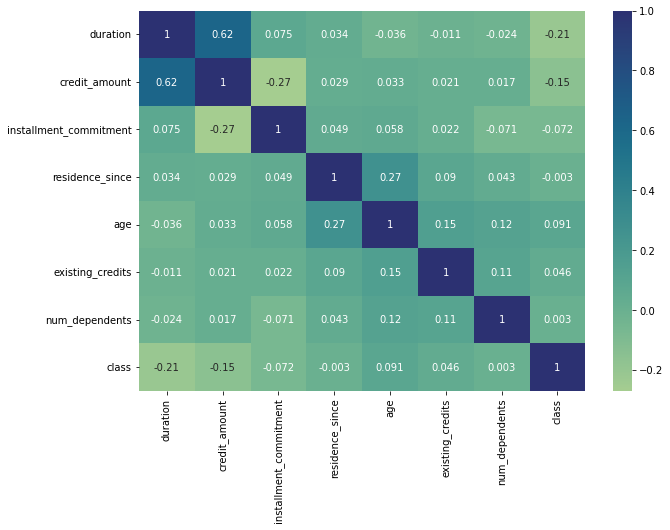

In [37]:
import seaborn as sns
tmp = bdf.copy()
tmp['class'] = bdf['class'].apply(lambda y: 1 if y.lower() == 'good' else 0)
plt.figure(figsize=(10, 7))
sns.heatmap(tmp.corr(), annot=True, cmap='crest')
plt.show()

### Show the relation between numerical features to the target, By plot the PairGrrid

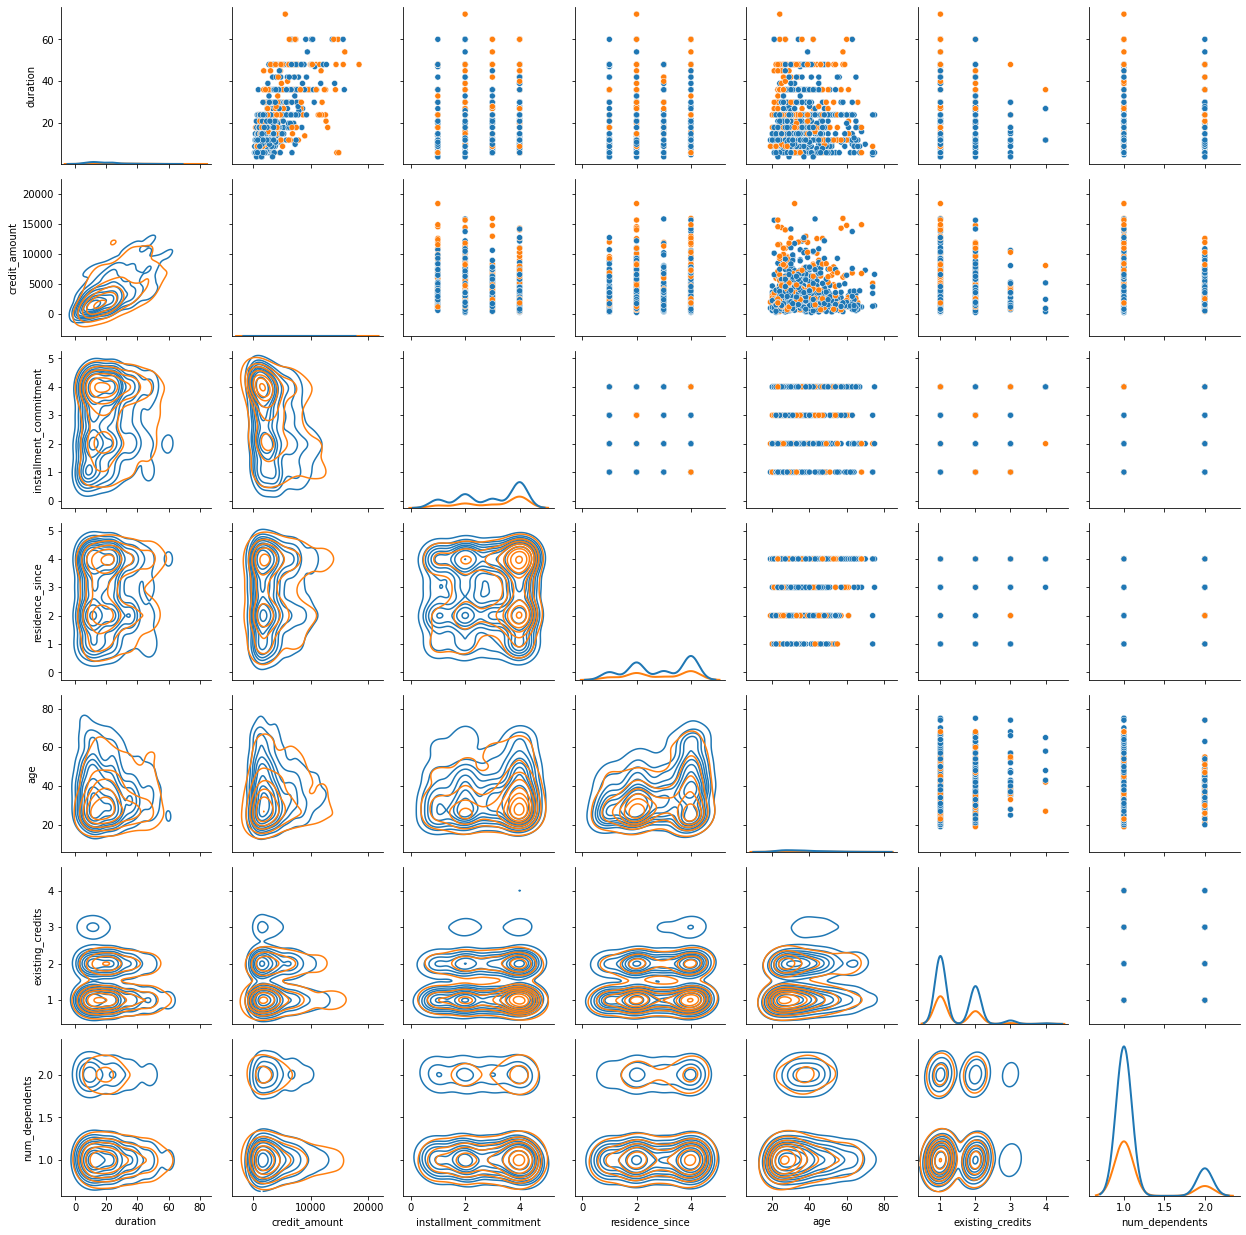

In [38]:
import seaborn
import seaborn as sns

graph = seaborn.PairGrid(bdf, hue ='class')
graph = graph.map_upper(sns.scatterplot)
graph = graph.map_lower(sns.kdeplot)
graph = graph.map_diag(sns.kdeplot, lw = 2)

In [39]:
ordinary_colimns = cat_col.drop(['purpose', 'other_parties', 'personal_status', ' other_payment_plans', 'property_magnitude'], axis=1)
ordinary_colimns = np.array(ordinary_colimns.columns)

checking_status_cat = ['no checking', '<0', '0<=X<200', '>=200']
credit_history_cat  = ['no credits/all paid', 'delayed previously', 'critical/other existing credit', 'existing paid', 'all paid']
savings_status_cat  = ['no known savings', '<100', '100<=X<500', '500<=X<1000', '>=1000']
employmen_cat       = ['unemployed', '<1', '1<=X<4', '4<=X<7', '>=7']
housing_cat         = ['for free', 'rent', 'own']
job_cat             = ['unemp/unskilled non res', 'unskilled resident', 'skilled', 'high qualif/self emp/mgmt']
own_telephone_cat   = ['none', 'yes']
foreign_worker_cat  = ['no', 'yes']

ordinary_categories = [
    checking_status_cat,
    credit_history_cat,
    savings_status_cat,
    employmen_cat,
    housing_cat,
    job_cat,
    own_telephone_cat,
    foreign_worker_cat
]

one_hot_col = ['purpose', 'other_parties', 'personal_status', ' other_payment_plans', 'property_magnitude']

### Show the relation between Ordinaly features to the target, By plot the PairGrrid

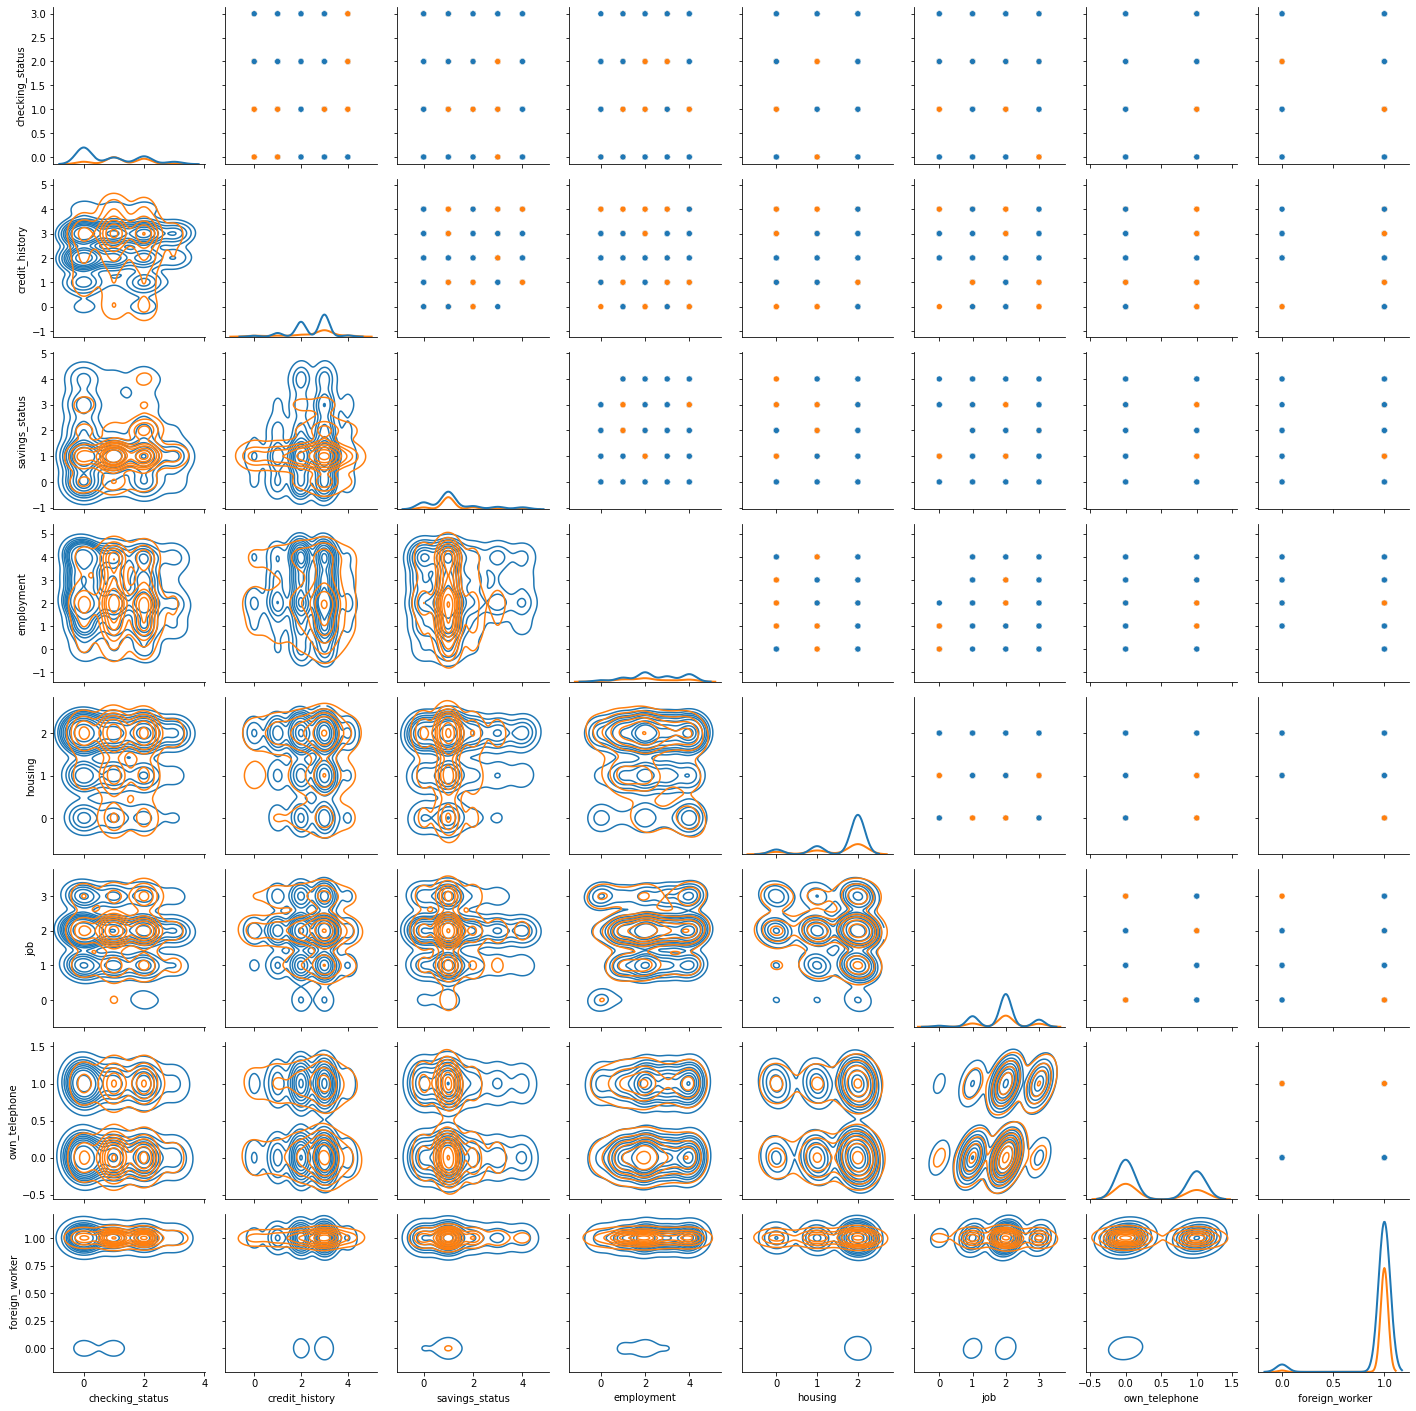

In [40]:
from sklearn.preprocessing import OrdinalEncoder

# df = bdf.select_dtypes(exclude="object")
df = pd.DataFrame()

ordinary_col = ['checking_status', 
                'credit_history', 
                'savings_status', 
                'employment', 
                'housing', 
                'job', 
                'own_telephone', 
                ' foreign_worker',
]

for i in range(len(ordinary_col)):
    enc = OrdinalEncoder(categories=[ordinary_categories[i]])
    df[ordinary_col[i]] = np.array(enc.fit_transform(bdf.loc[:,[ordinary_col[i]]]).tolist()).reshape(-1)

df['class'] = bdf['class']

graph = seaborn.PairGrid(df, hue ='class')
graph = graph.map_upper(sns.scatterplot)
graph = graph.map_lower(sns.kdeplot)
graph = graph.map_diag(sns.kdeplot, lw = 2)
plt.show()

### Setting a PCA on the data to show the better relation between first two features and target
At the first, let's create a pipeline for numerical and all the categuricall features to better solution

In [41]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder


def create_box(df):

    # num_col = df.select_dtypes(exclude="object").columns.tolist()

    ordinary_col = ['checking_status', 
                    'credit_history', 
                    'savings_status', 
                    'employment', 
                    'housing', 
                    'job', 
                    'own_telephone', 
                    ' foreign_worker'
    ]

    box = ColumnTransformer(
        transformers=[
            # ("numerical_step", StandardScaler(), num_col),
            ("ordinal_step", OrdinalEncoder(handle_unknown="error", categories=ordinary_categories), ordinary_col)
        ]
    )

    return box

box = create_box(bdf)
df = pd.DataFrame(box.fit_transform(bdf.drop('class', axis=1)))
df.shape

(1000, 8)

Create a PCA and change the dimention from 15 to 2

(2, 7)


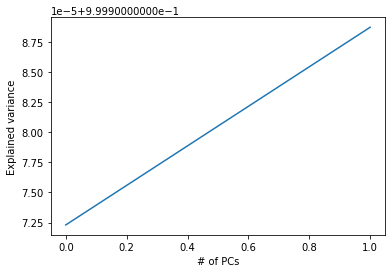

In [75]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2, whiten=True)
pca.fit(num_col)
print(pca.components_.shape)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("# of PCs")
plt.ylabel("Explained variance")
plt.show()

The variance equal to 0.88 is prety cool

<AxesSubplot:xlabel='x', ylabel='y'>

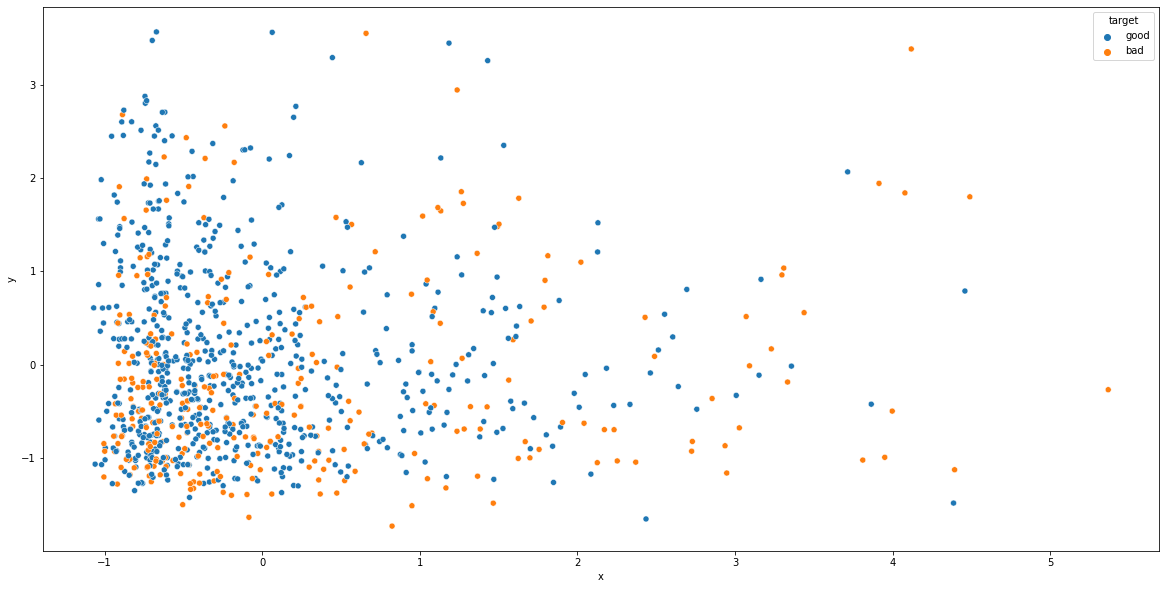

In [76]:
pca_projection = pca.transform(num_col)

pca_df = pd.DataFrame(
    np.c_[pca_projection[:, 0: 2], bdf['class']],
    columns=['x', 'y', 'target']
)
pca_df
plt.figure(figsize=(20, 10))
sns.scatterplot(data=pca_df, x="x", y="y", hue="target", marker='o')

(8, 8)


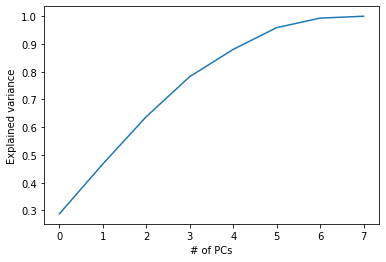

In [44]:
pca = PCA(n_components=8, whiten=True)
pca.fit(df)
print(pca.components_.shape)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("# of PCs")
plt.ylabel("Explained variance")
plt.show()

<AxesSubplot:xlabel='x', ylabel='y'>

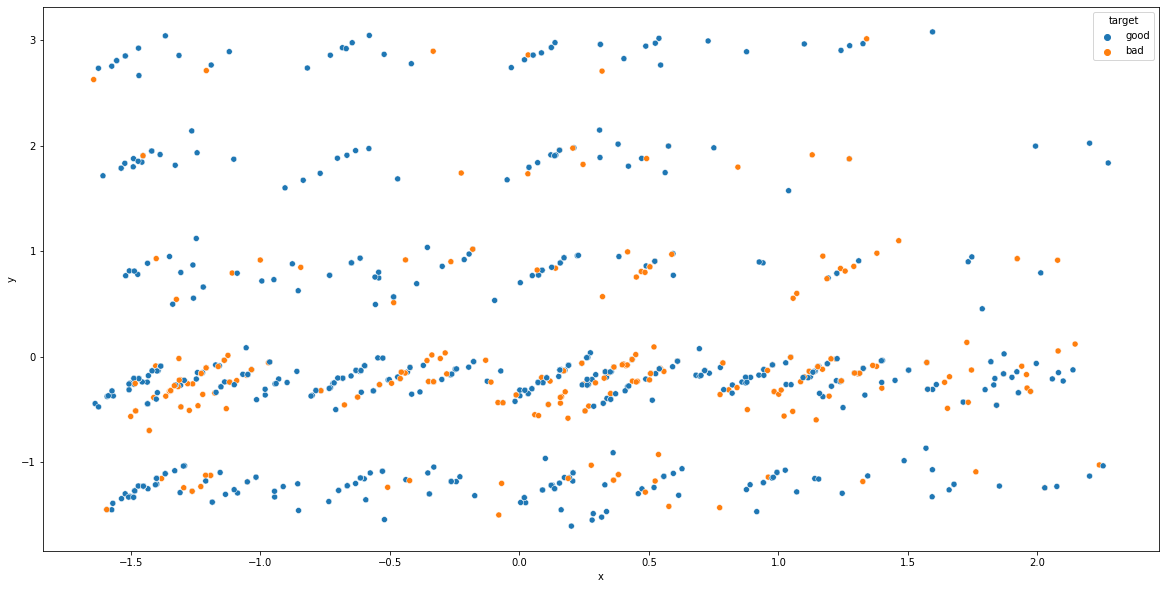

In [45]:
pca_projection = pca.transform(df)

pca_df = pd.DataFrame(
    np.c_[pca_projection[:, 0: 2], bdf['class']],
    columns=['x', 'y', 'target']
)

plt.figure(figsize=(20, 10))
sns.scatterplot(data=pca_df, x="x", y="y", hue="target", marker='o')

<AxesSubplot:xlabel='x', ylabel='y'>

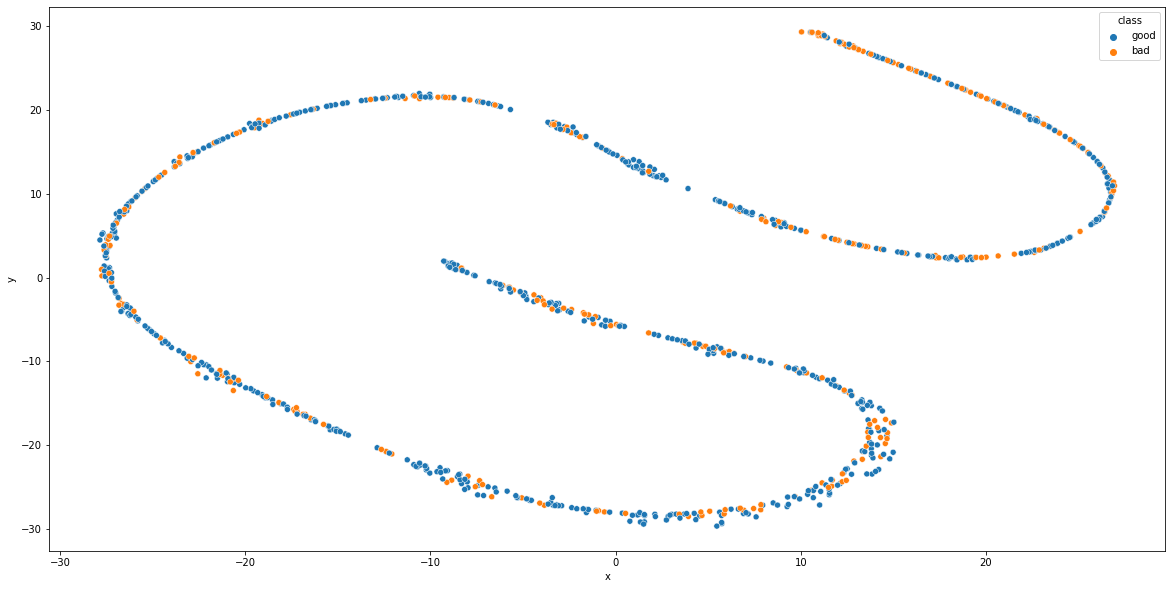

In [46]:
from sklearn.manifold import TSNE

tsne = TSNE(
    n_components=2,
    n_iter=500,
    n_iter_without_progress=150,
    n_jobs=2,
    random_state=0,
    learning_rate='auto',
    init='random'
)

tsne_projection = tsne.fit_transform(num_col)

tsne_df = pd.DataFrame(
    np.c_[tsne_projection, bdf['class']], 
    columns=['x', 'y', 'class']
)

plt.figure(figsize=(20, 10))
sns.scatterplot(tsne_df, x="x", y="y", hue="class", marker='o')

<AxesSubplot:xlabel='x', ylabel='y'>

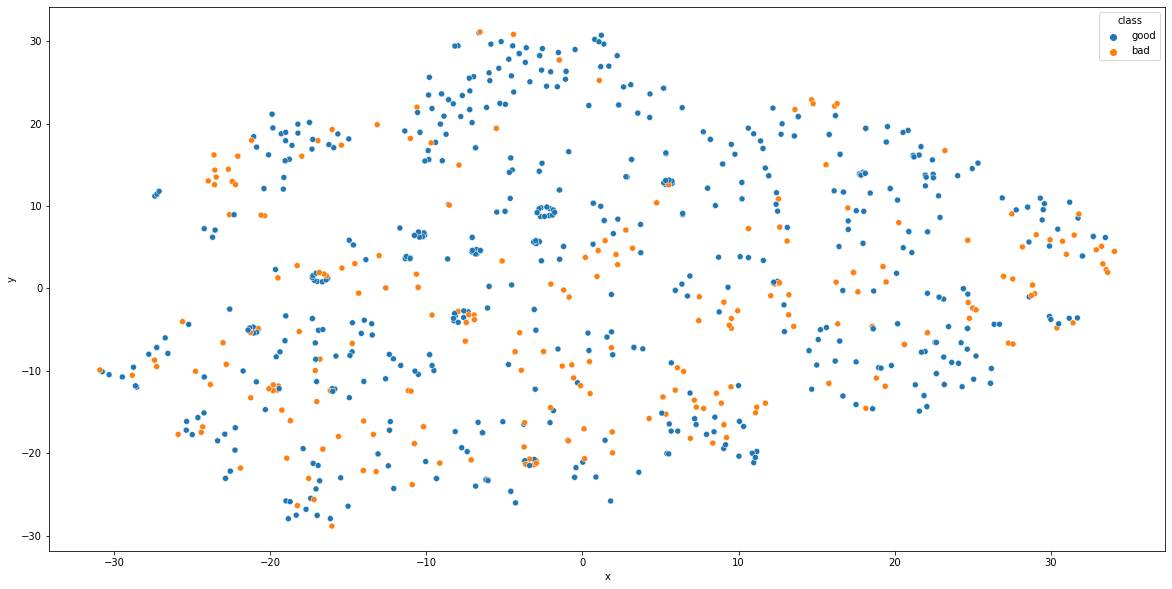

In [47]:
tsne_projection = tsne.fit_transform(df)

tsne_df = pd.DataFrame(
    np.c_[tsne_projection, bdf['class']], 
    columns=['x', 'y', 'class']
)

plt.figure(figsize=(20, 10))
sns.scatterplot(tsne_df, x="x", y="y", hue="class", marker='o')

### Create column transformer for three types of features

In [48]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

from sklearn.model_selection import train_test_split

def split_data(df, target):
    np.random.seed(42)

    x = df.drop(target, axis=1)
    y = df[target].apply(lambda y: 1 if y.lower() == 'good' else 0)
    
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20)

    return x_train, x_test, y_train, y_test

def create_box2(df):
    
    num_col = df.select_dtypes(exclude="object").columns.tolist()

    one_hot_col = ['purpose', 'other_parties', 'personal_status', ' other_payment_plans', 'property_magnitude']
    ordinary_col = ['checking_status', 
                    'credit_history', 
                    'savings_status', 
                    'employment', 
                    'housing', 
                    'job', 
                    'own_telephone', 
                    ' foreign_worker'
    ]

    box = ColumnTransformer(
        transformers=[
            ("numerical_step", StandardScaler(), num_col),
            ("one_hot_step", OneHotEncoder(handle_unknown="ignore"), one_hot_col),
            ("ordinal_step", OrdinalEncoder(handle_unknown="error", categories=ordinary_categories), ordinary_col)
        ]
    )
    
    return box


x_train, x_test, y_train, y_test = split_data(bdf, target=target)

box = create_box2(bdf)
box.fit_transform(x_train)
box

ColumnTransformer(transformers=[('numerical_step', StandardScaler(),
                                 ['duration', 'credit_amount',
                                  'installment_commitment', 'residence_since',
                                  'age', 'existing_credits',
                                  'num_dependents']),
                                ('one_hot_step',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 ['purpose', 'other_parties', 'personal_status',
                                  ' other_payment_plans',
                                  'property_magnitude']),
                                ('ordinal_step',
                                 Ordinal...
                                                            ['no known savings',
                                                             '<100',
                                                             '100<=X<500',
                                                             '500<=X<1000',
                                                             '>=1000'],
                                                            ['unemployed', '<1',
                                                             '1<=X<4', '4<=X<7',
                                                             '>=7'],
                                                            ['for free', 'rent',
                                                             'own'],
                                                            ['unemp/unskilled '
                                                             'non res',
                                                             'unskilled '
                                                             'resident',
                                                             'skilled',
                                                             'high qualif/self '
                                                             'emp/mgmt'],
                                                            ['none', 'yes'],
                                                            ['no', 'yes']]),
                                 ['checking_status', 'credit_history',
                                  'savings_status', 'employment', 'housing',
                                  'job', 'own_telephone', ' foreign_worker'])])

In [49]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

def report(model, x_test, y_test):

    disp = ConfusionMatrixDisplay.from_estimator(
        model,
        x_test,
        y_test,
        cmap=plt.cm.Blues,
        labels=[1, 0]
    )
    
    plt.show()
    
    # Make a prediction based on test data
    y_pred = model.predict(x_test)
    print(classification_report(y_test, y_pred))
    
    return


# Plot the AUC curve for the model

from sklearn.metrics import roc_curve, auc

def plot_auc(model, x_test, y_test):
    pred_prob = model.predict_proba(x_test)
    base_fpr, base_tpr, _ = roc_curve(y_test, [1 for _ in range(len(y_test))])
    model_fpr, model_tpr, _ = roc_curve(y_test, pred_prob[:, 1])

    plt.plot(base_fpr, base_tpr, 'b', label = 'baseline')
    plt.plot(model_fpr, model_tpr, 'r', label = 'model')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curves(AUC: {auc(model_fpr, model_tpr)})')
    plt.show()
    
    return

# Make an alarm when the model training done

from IPython.display import Audio, display

def rick():
    url = 'https://sound.peal.io/ps/audios/000/000/537/original/woo_vu_luvub_dub_dub.wav'
    display(Audio(url=url, autoplay=True))


def table_score(model):
    df = pd.concat(
    [
        pd.DataFrame(model.cv_results_["params"]),
        pd.DataFrame(model.cv_results_["mean_test_f1"], columns=[("F1")]),
        pd.DataFrame(model.cv_results_["mean_test_accuracy"], columns=[("Accuracy")]),
        pd.DataFrame(model.cv_results_["mean_test_recall"], columns=[("Recall")]),
        pd.DataFrame(model.cv_results_["mean_test_precision"], columns=[("Precision")])
    ],
    axis=1)
    return df


def fit_current_model(model, x_train, y_train, x_test, y_test):

    np.random.seed(42)

    model.fit(x_train,y_train)
    # Print best params
    print("Best: %f using %s" % (model.best_score_, model.best_params_))
    # Make a sound meaning stands for, the training time over
    rick()

    return model

### Let's create our first model by PCA decomposition and RandomforestClassifier
The perphose of this step is finding a good choice for k-fold cross-validation and best aprouch for this unbiased dataset
### WARNING
We used PCA in the Pipeline for prediction. But because of the low `Precision` in Confusion Matrix, we used all Features instead of PCA.

In [50]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split, KFold
from sklearn.metrics import f1_score, make_scorer, precision_score, recall_score, accuracy_score

from sklearn.decomposition import PCA

model = Pipeline(steps=[('preprocess', box), ('pca', PCA(n_components=20, whiten=True)), ('model', RandomForestClassifier())])

parameters = {
    'model__n_estimators':[10,50,100, 150],
    'model__max_depth':[2, 10, 20, 40, 50],
    'model__min_samples_split':[2, 3, 4, 5, 6, 7, 8, 9]
}

kfold = KFold(n_splits = 5)

scores=['accuracy', 'precision', 'recall', 'f1']

model_grid = GridSearchCV(model ,parameters, n_jobs=10, cv=kfold, scoring=scores, refit='accuracy')
model_grid

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(transformers=[('numerical_step',
                                                                         StandardScaler(),
                                                                         ['duration',
                                                                          'credit_amount',
                                                                          'installment_commitment',
                                                                          'residence_since',
                                                                          'age',
                                                                          'existing_credits',
                                                                          'num_dependents']),
                                                                        ('one_hot_step',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['purpo...
                                                                          'employment',
                                                                          'housing',
                                                                          'job',
                                                                          'own_telephone',
                                                                          ' '
                                                                          'foreign_worker'])])),
                                       ('pca',
                                        PCA(n_components=20, whiten=True)),
                                       ('model', RandomForestClassifier())]),
             n_jobs=10,
             param_grid={'model__max_depth': [2, 10, 20, 40, 50],
                         'model__min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9],
                         'model__n_estimators': [10, 50, 100, 150]},
             refit='accuracy',
             scoring=['accuracy', 'precision', 'recall', 'f1'])

Best: 0.741250 using {'model__max_depth': 20, 'model__min_samples_split': 7, 'model__n_estimators': 150}


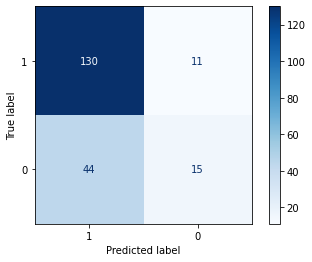

              precision    recall  f1-score   support

           0       0.58      0.25      0.35        59
           1       0.75      0.92      0.83       141

    accuracy                           0.73       200
   macro avg       0.66      0.59      0.59       200
weighted avg       0.70      0.72      0.69       200



In [51]:
history = fit_current_model(model_grid, x_train, y_train, x_test, y_test)
report(model_grid, x_test, y_test)

### First approach, Using `precision` scores for our GridSearchCV

Best: 0.771217 using {'model__max_depth': 50, 'model__min_samples_split': 3, 'model__n_estimators': 10}


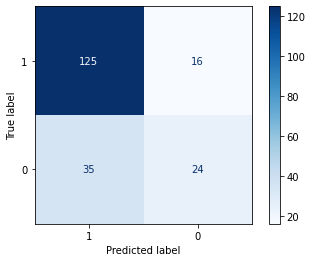

              precision    recall  f1-score   support

           0       0.60      0.41      0.48        59
           1       0.78      0.89      0.83       141

    accuracy                           0.74       200
   macro avg       0.69      0.65      0.66       200
weighted avg       0.73      0.74      0.73       200



In [52]:
kfold = KFold(n_splits = 7)

scores=['accuracy', 'precision', 'recall', 'f1']

model_grid = GridSearchCV(model ,parameters, n_jobs=10, cv=kfold, scoring=scores, refit='precision')

history = fit_current_model(model_grid, x_train, y_train, x_test, y_test)
report(model_grid, x_test, y_test)

### Second approach, Using `Sample weight`
The result of last aprouch was perfect, so we don't touch `refit='precision'` in our GridSearch object

Best: 0.808659 using {'model__max_depth': 2, 'model__min_samples_split': 2, 'model__n_estimators': 50}


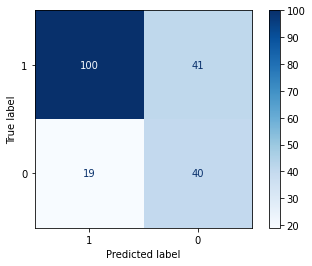

              precision    recall  f1-score   support

           0       0.49      0.68      0.57        59
           1       0.84      0.71      0.77       141

    accuracy                           0.70       200
   macro avg       0.67      0.69      0.67       200
weighted avg       0.74      0.70      0.71       200



In [53]:
from sklearn.utils.class_weight import compute_sample_weight

sample_we = compute_sample_weight(class_weight='balanced', y=y_train)

model_grid.fit(x_train, y_train, model__sample_weight=sample_we)

# Print best params
print("Best: %f using %s" % (model_grid.best_score_, model_grid.best_params_))
# Make a sound meaning stands for, the training time over
rick()
report(model_grid, x_test, y_test)

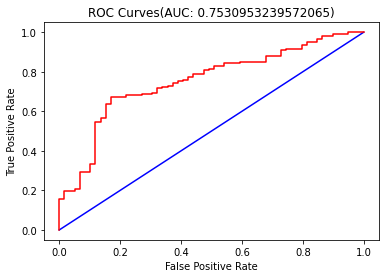

In [54]:
plot_auc(model_grid, x_test, y_test)

### Third approach, Using `Random Under Sampler`
The result of last two aprouch was good (but not for FN)

Best: 0.532020 using {'model__max_depth': 10, 'model__min_samples_split': 6, 'model__n_estimators': 100}


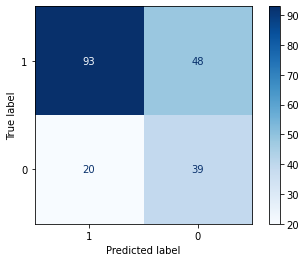

              precision    recall  f1-score   support

           0       0.45      0.66      0.53        59
           1       0.82      0.66      0.73       141

    accuracy                           0.66       200
   macro avg       0.64      0.66      0.63       200
weighted avg       0.71      0.66      0.67       200



In [55]:
from imblearn.under_sampling import RandomUnderSampler

x_train_sampled, y_train_sampled = (
    RandomUnderSampler(sampling_strategy=1.0, random_state=0)
    .fit_resample(x_train, y_train)
)

sample_we = compute_sample_weight(class_weight='balanced', y=y_train_sampled)

model_grid.fit(x_train_sampled, y_train_sampled, model__sample_weight=sample_we)

# Print best params
print("Best: %f using %s" % (model_grid.best_score_, model_grid.best_params_))
# Make a sound meaning stands for, the training time over
rick()
report(model_grid, x_test, y_test)

### Fourth approach, Using `Random Over Sampler`
The third result was not cool! 

Let's see precision refit and sample weights with random over sampler

Best: 0.672526 using {'model__max_depth': 10, 'model__min_samples_split': 6, 'model__n_estimators': 150}


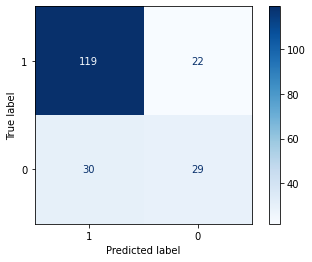

              precision    recall  f1-score   support

           0       0.57      0.49      0.53        59
           1       0.80      0.84      0.82       141

    accuracy                           0.74       200
   macro avg       0.68      0.67      0.67       200
weighted avg       0.73      0.74      0.73       200



In [56]:
from imblearn.over_sampling import RandomOverSampler

x_train_sampled, y_train_sampled = (
    RandomOverSampler(sampling_strategy=1.0, random_state=0)
    .fit_resample(x_train, y_train)
)

sample_we = compute_sample_weight(class_weight='balanced', y=y_train_sampled)

model_grid.fit(x_train_sampled, y_train_sampled, model__sample_weight=sample_we)

# Print best params
print("Best: %f using %s" % (model_grid.best_score_, model_grid.best_params_))
# Make a sound meaning stands for, the training time over
rick()
report(model_grid, x_test, y_test)

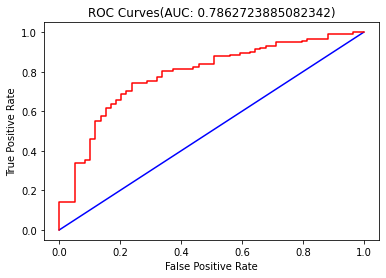

In [57]:
plot_auc(model_grid, x_test, y_test)

In [58]:
from sklearn.svm import SVC

model2 = Pipeline(steps=[('preprocess', box), ('model', SVC(probability=True))])

kfold = KFold(n_splits = 20)

parameters2 = {
    'model__C': [0.1, 1, 10, 100], 
    'model__gamma': [1, .1, .01, .001],
    'model__kernel': ['rbf', 'poly', 'sigmoid']
}

model_grid2 = GridSearchCV(model2, param_grid=parameters2, n_jobs=10, cv=kfold, scoring=scores, refit='precision')
model_grid2

GridSearchCV(cv=KFold(n_splits=20, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(transformers=[('numerical_step',
                                                                         StandardScaler(),
                                                                         ['duration',
                                                                          'credit_amount',
                                                                          'installment_commitment',
                                                                          'residence_since',
                                                                          'age',
                                                                          'existing_credits',
                                                                          'num_dependents']),
                                                                        ('one_hot_step',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['purp...
                                                                                                     'yes']]),
                                                                         ['checking_status',
                                                                          'credit_history',
                                                                          'savings_status',
                                                                          'employment',
                                                                          'housing',
                                                                          'job',
                                                                          'own_telephone',
                                                                          ' '
                                                                          'foreign_worker'])])),
                                       ('model', SVC(probability=True))]),
             n_jobs=10,
             param_grid={'model__C': [0.1, 1, 10, 100],
                         'model__gamma': [1, 0.1, 0.01, 0.001],
                         'model__kernel': ['rbf', 'poly', 'sigmoid']},
             refit='precision',
             scoring=['accuracy', 'precision', 'recall', 'f1'])

Best: 0.781644 using {'model__C': 100, 'model__gamma': 0.01, 'model__kernel': 'rbf'}


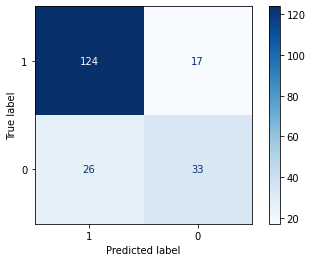

              precision    recall  f1-score   support

           0       0.66      0.56      0.61        59
           1       0.83      0.88      0.85       141

    accuracy                           0.79       200
   macro avg       0.74      0.72      0.73       200
weighted avg       0.78      0.79      0.78       200



In [59]:
model_grid2.fit(x_train, y_train)

# Print best params
print("Best: %f using %s" % (model_grid2.best_score_, model_grid2.best_params_))
# Make a sound meaning stands for, the training time over
rick()
report(model_grid2, x_test, y_test)

The SVM model above was trained by x_train_sampled, but the finil result was not good as x_train

In [122]:
from sklearn.linear_model import LogisticRegression

model3 = Pipeline(steps=[('preprocess', box), ('model', LogisticRegression())])

kfold = KFold(n_splits = 7)

parameters3 = {
    # 'model__alpha': [0.01, 0.03, 0.07, 0.1, 0.3, 0.7, 1],
    'model__max_iter': [100, 200, 500, 700, 1000],
    'model__penalty': ['l2', 'none'],
    # 'model__class_weight': [None, sample_we],
    'model__solver': ['sag'],
}

model_grid3 = GridSearchCV(model3, parameters3, n_jobs=10, cv=kfold, scoring=scores, refit='recall')
model_grid3

GridSearchCV(cv=KFold(n_splits=7, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(transformers=[('numerical_step',
                                                                         StandardScaler(),
                                                                         ['duration',
                                                                          'credit_amount',
                                                                          'installment_commitment',
                                                                          'residence_since',
                                                                          'age',
                                                                          'existing_credits',
                                                                          'num_dependents']),
                                                                        ('one_hot_step',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['purpo...
                                                                                                    ['no',
                                                                                                     'yes']]),
                                                                         ['checking_status',
                                                                          'credit_history',
                                                                          'savings_status',
                                                                          'employment',
                                                                          'housing',
                                                                          'job',
                                                                          'own_telephone',
                                                                          ' '
                                                                          'foreign_worker'])])),
                                       ('model', LogisticRegression())]),
             n_jobs=10,
             param_grid={'model__max_iter': [100, 200, 500, 700, 1000],
                         'model__penalty': ['l2', 'none'],
                         'model__solver': ['sag']},
             refit='recall', scoring=['accuracy', 'precision', 'recall', 'f1'])

Best: 0.662619 using {'model__max_iter': 100, 'model__penalty': 'none', 'model__solver': 'sag'}


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


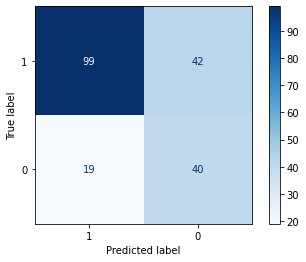

              precision    recall  f1-score   support

           0       0.49      0.68      0.57        59
           1       0.84      0.70      0.76       141

    accuracy                           0.69       200
   macro avg       0.66      0.69      0.67       200
weighted avg       0.74      0.69      0.71       200



In [123]:
sample_we = compute_sample_weight(class_weight='balanced', y=y_train)

model_grid3.fit(x_train, y_train, model__sample_weight=sample_we)

# Print best params
print("Best: %f using %s" % (model_grid3.best_score_, model_grid3.best_params_))
# Make a sound meaning stands for, the training time over
rick()
report(model_grid3, x_test, y_test)

In [145]:
from sklearn.ensemble import IsolationForest

model4 = Pipeline(steps=[('preprocess', box), ('model', IsolationForest())])

kfold = KFold(n_splits = 2)

parameters4 = {
    'model__n_estimators': np.arange(10, 100, 10),
    'model__max_samples': [8, 10, 15, 20]
}

model_grid4 = GridSearchCV(model4, parameters4, n_jobs=10, cv=kfold, scoring=scores, refit='f1')
model_grid4

GridSearchCV(cv=KFold(n_splits=2, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(transformers=[('numerical_step',
                                                                         StandardScaler(),
                                                                         ['duration',
                                                                          'credit_amount',
                                                                          'installment_commitment',
                                                                          'residence_since',
                                                                          'age',
                                                                          'existing_credits',
                                                                          'num_dependents']),
                                                                        ('one_hot_step',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['purpo...
                                                                                                    ['none',
                                                                                                     'yes'],
                                                                                                    ['no',
                                                                                                     'yes']]),
                                                                         ['checking_status',
                                                                          'credit_history',
                                                                          'savings_status',
                                                                          'employment',
                                                                          'housing',
                                                                          'job',
                                                                          'own_telephone',
                                                                          ' '
                                                                          'foreign_worker'])])),
                                       ('model', IsolationForest())]),
             n_jobs=10,
             param_grid={'model__max_samples': [8, 10, 15, 20],
                         'model__n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
             refit='f1', scoring=['accuracy', 'precision', 'recall', 'f1'])

In [146]:
from sklearn.metrics import classification_report

def fit_isolated(model, x_train, y_train, x_test, y_test):
    model = model.fit(x_train, y_train)
    
    y_pred = model.predict(x_test)
    
    y_pred[y_pred == 1] = 1
    y_pred[y_pred == -1] = 0
    
    print("Accuracy: ", accuracy_score(y_test, y_pred))
    
    print()
    print("Confusion matrix:")
    print(confusion_matrix(y_test, y_pred))
    
    print()
    print("Classification report:")
    print(classification_report(y_test, y_pred))

fit_isolated(model_grid4, x_train_sampled, y_train_sampled, x_test, y_test)

Accuracy:  0.49

Confusion matrix:
[[30 29]
 [73 68]]

Classification report:
              precision    recall  f1-score   support

           0       0.29      0.51      0.37        59
           1       0.70      0.48      0.57       141

    accuracy                           0.49       200
   macro avg       0.50      0.50      0.47       200
weighted avg       0.58      0.49      0.51       200



/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_search.py:953: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


### The best model in this Project was Based on SVC,
Let's see it's details on test data

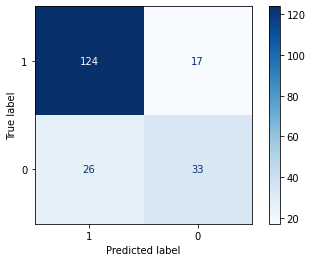

              precision    recall  f1-score   support

           0       0.66      0.56      0.61        59
           1       0.83      0.88      0.85       141

    accuracy                           0.79       200
   macro avg       0.74      0.72      0.73       200
weighted avg       0.78      0.79      0.78       200



In [65]:
report(model_grid2, x_test, y_test)

Let's see it's details on train data

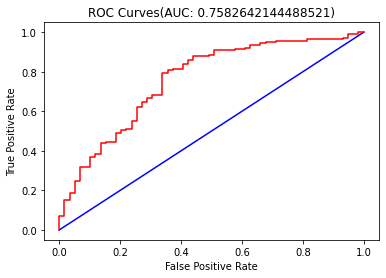

In [66]:
plot_auc(model_grid2, x_test, y_test)

All of the f1, Accuracy, Recall and Precision scores for any state of our GridSearchCV in RandomForestClassifier

In [68]:
table_score(model_grid2)

,model__C,model__gamma,model__kernel,F1,Accuracy,Recall,Precision
0,0.1,1.000,rbf,0.820818,0.69875,1.000000,0.698750
1,0.1,1.000,poly,0.764718,0.67375,0.768794,0.765903
2,0.1,1.000,sigmoid,0.820818,0.69875,1.000000,0.698750
3,0.1,0.100,rbf,0.820818,0.69875,1.000000,0.698750
4,0.1,0.100,poly,0.816459,0.72625,0.884131,0.762359
5,0.1,0.100,sigmoid,0.820818,0.69875,1.000000,0.698750
6,0.1,0.010,rbf,0.820818,0.69875,1.000000,0.698750
7,0.1,0.010,poly,0.820818,0.69875,1.000000,0.698750
8,0.1,0.010,sigmoid,0.820818,0.69875,1.000000,0.698750
9,0.1,0.001,rbf,0.820818,0.69875,1.000000,0.698750


### DecisionBoundaryDisplay

In [105]:
num_col = bdf.select_dtypes(exclude="object").columns.tolist()

box2 = ColumnTransformer(
    transformers=[
        ("numerical_step", StandardScaler(), num_col),
        ("ordinal_step", OrdinalEncoder(handle_unknown="error", categories=ordinary_categories), ordinary_col)
    ]
)

df = pd.DataFrame(box2.fit_transform(bdf.drop('class', axis=1)))

pca = PCA(n_components=2, whiten=True)
pca.fit(df)

pca_projection = pca.transform(df)

pca_df = pd.DataFrame(
    np.c_[pca_projection[:, 0: 2], bdf['class']],
    columns=['x', 'y', 'target']
)

In [106]:
model2 = Pipeline(steps=[('model', SVC(probability=True))])

kfold = KFold(n_splits = 2)

parameters2 = {
    'model__C': [0.1, 1, 10, 100], 
    'model__gamma': [1, .1, .01, .001],
    'model__kernel': ['rbf', 'poly', 'sigmoid']
}

model_grid2 = GridSearchCV(model2, param_grid=parameters2, n_jobs=10, cv=kfold, scoring=scores, refit='precision')

_x_train, _x_test, _y_train, _y_test = split_data(pca_df, target='target')


a = np.ndarray((_x_train.shape[0], 2))
a[:,0] = _x_train['x'].to_numpy()
a[:,1] = _x_train['y'].to_numpy()

model_grid2.fit(a, np.array(_y_train))

# Print best params
print("Best: %f using %s" % (model_grid2.best_score_, model_grid2.best_params_))
# Make a sound meaning stands for, the training time over
rick()

Best: 0.722202 using {'model__C': 100, 'model__gamma': 1, 'model__kernel': 'sigmoid'}


<Figure size 1080x1080 with 0 Axes>

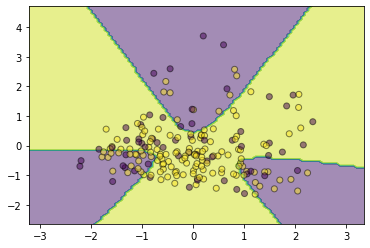

In [107]:
a = np.ndarray((_x_test.shape[0], 2))
a[:,0] = _x_test['x'].to_numpy()
a[:,1] = _x_test['y'].to_numpy()

from sklearn.inspection import DecisionBoundaryDisplay
plt.figure(figsize=(15, 15))
DecisionBoundaryDisplay.from_estimator(model_grid2, a, response_method="predict", alpha=0.5)
plt.scatter(a[:, 0], a[:, 1], c=np.array(_y_test), alpha=.5, edgecolor="k")

plt.show()